# COSE474-2024F : Deep Learning HW1

**Name**: Song Sanghwa. **Department**: Statistics. **Student ID**: 2019150470


## 0.1 **Installation**

In [ ]:
c

[link text](https://)## 2.1 Data Manipulation

### 2.1.1 Getting Started



In [ ]:
import torch

In [ ]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3, 4)

tensor([[ 0.6535,  0.8519,  1.0040,  0.1994],
        [ 0.1031,  0.1897,  0.3925,  1.3753],
        [-0.2831,  0.2730, -0.5964, -0.1641]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2 Indexing and Slicing

In [ ]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.3 Operations

In [ ]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

### 2.1.4 Broadcasting

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5 Saving Memory

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 133224793241088
id(Z): 133224793241088


In [ ]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6. Conversion to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.2 Data Preprocessing

### 2.2.1. Reading the Dataset

In [ ]:
import os

In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2. Data Preparation

In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3. Conversion to the Tensor Format

In [ ]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 Linear Algebra

In [ ]:
import torch

### 2.3.1 Scalars

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2. Vectors

In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
x[2]

tensor(2)

In [ ]:
len(x)

3

In [ ]:
x.shape

torch.Size([3])

### 2.3.3. Matrices

In [ ]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4. Tensors

In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5. Basic Properties of Tensor Arithmetic

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [ ]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6 Reduction

In [ ]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [ ]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [ ]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.7. Non-Reduction Sum

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 2.3.8 Dot Products

In [ ]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [ ]:
torch.sum(x * y)

tensor(3.)

### 2.3.9 Matrix-Vector Products

In [ ]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 2.3.10 Matrix-Matrix Multiplication

In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11 Norms


In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [ ]:
torch.abs(u).sum()

tensor(7.)

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 2.5. Automatic Differentiation

In [ ]:
import torch

### 2.5.1. A Simple Function

In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3. Detaching Computation

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4 Gradients and Python Control Flow

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [ ]:
a.grad == d / a

tensor(True)

## 3.1. Linear Regression

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

### 3.1.1. Basics

### 3.1.2 Vectorization for Speed

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [ ]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.22144 sec'

In [ ]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00224 sec'

### 3.1.3. The Normal Distribution and Squared Loss

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

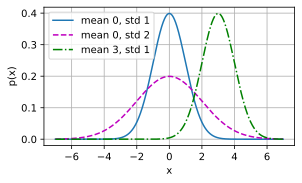

In [ ]:
# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

## 3.2. Object-Oriented Design for Implementation


In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 3.2.1. Utilities

In [ ]:
def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [ ]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [ ]:
class HyperParameters:
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [ ]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [ ]:
class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

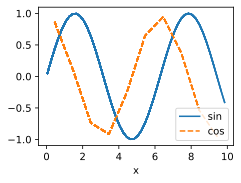

In [ ]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### 3.2.2 Models

In [ ]:
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### 3.2.3 Data

In [ ]:
class DataModule(d2l.HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### 3.2.4 Training

In [ ]:
class Trainer(d2l.HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

## 3.4. Linear Regression Implementation from Scratch

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 3.4.1. Defining the Model

In [ ]:
class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2 Defining the Loss Function

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3 Defining the Optimization Algorithm

In [ ]:
class SGD(d2l.HyperParameters):
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4 Training

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

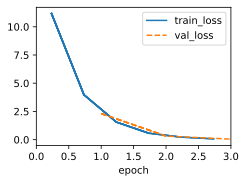

In [ ]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1226, -0.1635])
error in estimating b: tensor([0.2193])


## 4.1 Softmax Regression

## 4.2 The Image Classification Dataset


In [ ]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 4.2.1 Loading the Dataset

In [ ]:
class FashionMNIST(d2l.DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [ ]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:05<00:00, 4910847.96it/s] 


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272825.59it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 902365.72it/s] 


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5200452.07it/s]


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [ ]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [ ]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### 4.2.2 Reading a Minibatch

In [ ]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [ ]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'14.53 sec'

### 4.2.3 Visualization

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    raise NotImplementedError

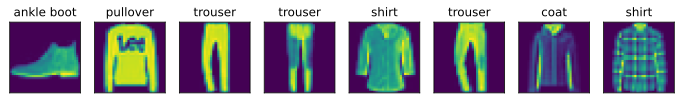

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## 4.3 The Base Classification Model

In [ ]:
import torch
from d2l import torch as d2l

### 4.3.1. The Classifier Class

In [ ]:
class Classifier(d2l.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [ ]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2 Accuracy

In [ ]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

## 4.4. Softmax Regression Implementation from Scratch

In [ ]:
import torch
from d2l import torch as d2l

### 4.4.1. The Softmax

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [ ]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [ ]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1554, 0.1463, 0.3007, 0.1500, 0.2477],
         [0.2063, 0.1380, 0.2080, 0.1962, 0.2515]]),
 tensor([1.0000, 1.0000]))

### 4.4.2. The Model

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

### 4.4.3. The Cross-Entropy Loss

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4. Training

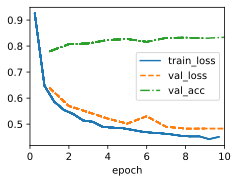

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 4.4.5. Prediction

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

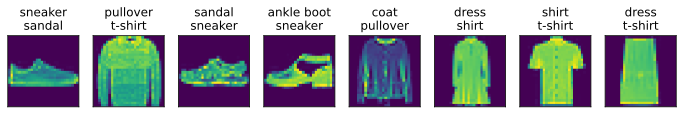

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

## 5.1. Multilayer Perceptrons

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

### 5.1.1. Hidden Layers

### 5.1.2. Activation Functions

#### 5.1.2.1. ReLU Function

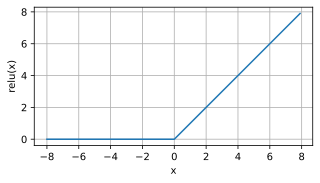

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

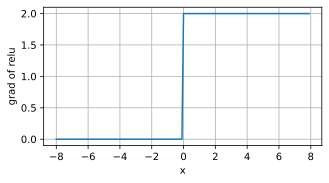

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### 5.1.2.2. Sigmoid Function

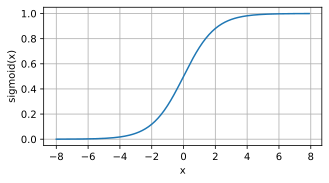

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

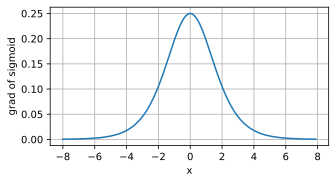

In [ ]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 5.1.2.3. Tanh Function

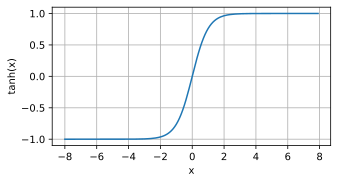

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

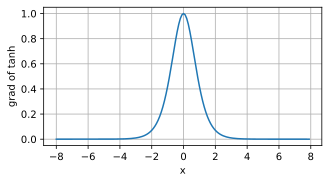

In [ ]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 5.2. Implementation of Multilayer Perceptrons

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 5.2.1 Implementation from Scratch

#### 5.2.1.1. Initializing Model Parameters

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 5.2.1.2. Model

In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [ ]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### 5.2.1.3. Training

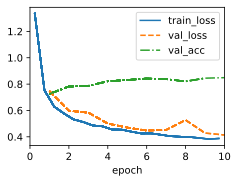

In [ ]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2. Concise Implementation

#### 5.2.2.1. Model

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

5.2.2.2. Training

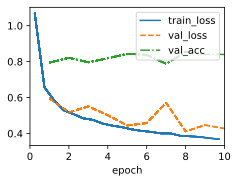

In [ ]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

### 5.3.1. Forward Propagation

### 5.3.2. Computational Graph of Forward Propagation

### 5.3.3. Backpropagation

# Discussion & Exercises

## 2.5. Memo
- Because deep learning frameworks vary in how they interpret gradients of non-scalar tensors, PyTorch takes some steps to avoid confusion. Invoking backward on a non-scalar elicits an error unless we tell PyTorch how to reduce the object to a scalar. More formally, we need to provide some vector $\mathbf{v}$ such that backward will compute $\mathbf{v}^{\top} \partial_{x}{y}$
 rather than $\partial_{x}{y}$. This next part may be confusing, but for reasons that will become clear later, this argument (representing) is named gradient. For a more detailed description, see Yang Zhang's [Medium post](https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29).

- suppose we have z = x * y and y = x * x but we want to focus on the direct influence of x on z rather than the influence conveyed via y. In this case, we can create a new variable u that takes the same value as y but whose provenance (how it was created) has been wiped out. Thus u has no ancestors in the graph and gradients do not flow through u to x.

## 3.1. Memo
- However, the loss surfaces for deep networks contain many saddle points and minima. Fortunately, we typically do not care about finding an exact set of parameters but merely any set of parameters that leads to accurate predictions (and thus low loss). In practice, deep learning practitioners seldom struggle to find parameters that minimize the loss on training sets (Frankle and Carbin, 2018, Izmailov et al., 2018). The more formidable task is to find parameters that lead to accurate predictions on previously unseen data, a challenge called generalization.
    - I guess high performance in generalization is often achieved even if the parameter set was not optimal.

## 4.1. Memo

- What makes it challenging is that we do not necessarily strive for the most compact representation or the smallest number of floating point operations but rather for the solution that can be executed most efficiently on modern GPUs.

- What kind of research are performed to improve the performance while reducing the computational cost?

    - Model Compression Techniques
    - Efficient Neural Network Architectures
    - Optimized Algorithms for Training
    - Design Network and Algorithms for Specific Hardware
    - Distributed Learning
    - Data Augmentation and Sampling
    - ...


## 5.1. Memo

- This problem of nonlinearity has been studied for at least a century (Fisher, 1925). For instance, decision trees in their most basic form use a sequence of binary decisions to decide upon class membership (Quinlan, 1993). Likewise, kernel methods have been used for many decades to model nonlinear dependencies (Aronszajn, 1950). This has found its way into nonparametric spline models (Wahba, 1990) and kernel methods (Schölkopf and Smola, 2002). It is also something that the brain solves quite naturally. After all, neurons feed into other neurons which, in turn, feed into other neurons again (Ramón y Cajal and Azoulay, 1894). Consequently we have a sequence of relatively simple transformations.

- The most popular choice, due to both simplicity of implementation and its good performance on a variety of predictive tasks, is the rectified linear unit (ReLU) (Nair and Hinton, 2010). ReLU provides a very simple nonlinear transformation.

- Why ReLu function is so popular as an activation function?
    - Alleviation of the Vanishing Gradient Problem
    - Sparsity in Activation
    - Emperical results show that ReLu achieves decent performance in various tasks

## 2.5.6 Exercises
Let $f(x) = ((\log {x^{2}}) \cdot \sin {x}) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.

- Consider the following nodes from $x$:
    - $ x \rightarrow x^{2} \rightarrow \log {x^{2}} $
    - $ x \rightarrow \sin {x} $
    - $ x \rightarrow x^{-1} $
- Above nodes are merged in sequence to form $f(x)$.


## 3.2.6. My Exercise

What classes are defined in the chapter?
- **Utilities**: @add_to_class, HyperParameters, ProgressBoard
- **Models**: Module with loss (for backward), forward, plot
- **Data**: DataModule with dataloaders
- **Training**: Trainer with prepare and fit


## 4.2.5. Exercises

Does reducing the batch_size (for instance, to 1) affect the reading performance?

- Reading multiple batches at once is much faster. There are some overhead in fetching and loading the data which leads to I/O bottleneck.

In [ ]:
data = FashionMNIST(resize=(32, 32))

In [ ]:
data.batch_size = 1

In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


'153.55 sec'


The data iterator performance is important. Do you think the current implementation is fast enough? Explore various options to improve it. Use a system profiler to find out where the bottlenecks are.

- If data is loaded every time `iter` is called, a bottleneck may occur for the same reason as above. **Batching or prefetching** will help reduce overhead.



## 5.1.4 Exercises

Show that adding layers to a linear deep network, i.e., a network without nonlinearity can never increase the expressive power of the network. Give an example where it actively reduces it.
- Since the composite of linear functions is linear, a network without nolinearity does not increase any further complexity to the model.

Assume that we have a nonlinearity that applies to one minibatch at a time, such as the batch normalization (Ioffe and Szegedy, 2015). What kinds of problems do you expect this to cause?

- I understand this question as guessing the problem when we apply different non-linearity for different mini batches.
I think there will be an inconsistency between training and testing because we can't figure out what activation function to use in testing.

Compute the derivative of the **pReLU** activation function.


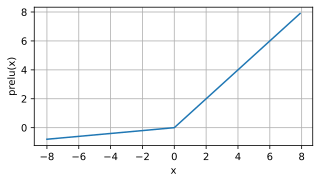

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.prelu(x, weight=torch.tensor([0.1]))
d2l.plot(x.detach(), y.detach(), 'x', 'prelu(x)', figsize=(5, 2.5))

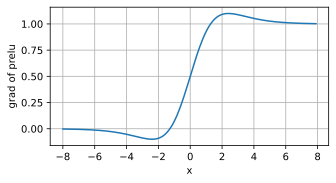

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of prelu', figsize=(5, 2.5))

Compute the derivative of the **Swish** activation function.

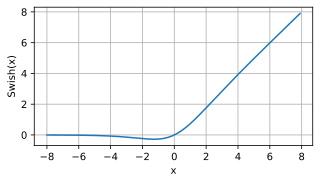

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x * torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'Swish(x)', figsize=(5, 2.5))

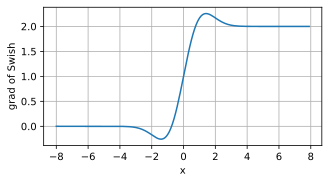

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of Swish', figsize=(5, 2.5))

Compute the derivative of the **GELU** activation function.

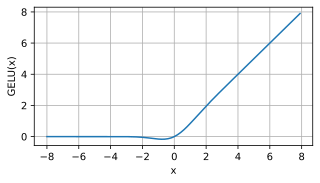

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.nn.functional.gelu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'GELU(x)', figsize=(5, 2.5))

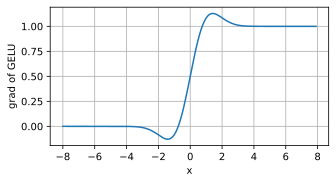

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of GELU', figsize=(5, 2.5))